## ▶회귀분석(LinearRegression)
- https://mindscale.kr/course/basic-stat-python/9

- 회귀분석(regression)은 가장 넓은 의미로는 독립변수(x)로 종속변수(y)를 예측하는 것을 의미한다.
- 독립변수라 특징, 필드, x값이라고함
- 종속변수는 라벨, y값이라고 함
- 이러한 라벨을 제공하는 분석기법을 지도학습이라고 함
- 참고) 라벨(결과값)을 제공하지 않는 분류기법은 비지도학습이라고 함(예: 강화학습)

### [독립변수와 종속변수]

- 체중과 식사량의 관계에 대한 모형을 만든다고 해보자. 이 모형에서 체중이 식사량에 따라 달라진다고 가정하면, 식사량이 많아지면 체중도 증가하고, 식사량이 감소하면 체중도 감소할 것이다. 그러면 체중은 식사량에 종속되었다고 할 수 있다. 그래서 체중은 종속변수가 된다.

- 그런데 이 모형은 체중이 식사량이 왜 변하는지는 말하고 있지 않다. 식사량은 모형에 독립적으로 변하므로, 독립변수가 된다.

- 정리하자면:

    - 독립변수: 변수의 변화 원인이 모형 밖에 있는 변수
    - 종속변수: 변수의 변화 원인이 모형 안에 있을 변수
    
### [선형회귀분석]
- 회귀분석을 좀 더 좁은 의미로 말할 때는 종속변수가 연속인 경우를 말한다. 종속변수가 범주형인 경우에는 '분류'라고 한다.

- 더 좁은 의미로는 선형 회귀 분석을 의미한다. 선형 회귀 분석은 독립변수와 종속변수 사이에 직선적인 형태의 관계가 있다고 가정을 한다.

- 직선적인 형태란 독립변수가 일정하게 증가하면, 종속변수도 그에 비례해서 증가하거나 또는 감소하는 형태를 말한다.

- 예를 들어 밥을 한 그릇 더 먹으면 체중이 정확히 100g 증가한다면 직선적인 형태라고 할 수 있다. 밥을 한 그릇, 두 그릇, 세 그릇, .. 먹으면 체중이 100g, 200g, 300g으로 증가하기 때문에 이것을 그림으로 그려보면 직선이 그려진다.

In [183]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
df=pd.DataFrame({'speed':[4,4,7,7,8,9,10,10,10,11,11,12,12,12,12,13,13,13,13,14,14,14,14,15,15,15,16,16,17,17,17,18,1,18,18,19,19,19,20,20,20,20,20,22,23,24,24,24,24,25],
                 'dist':[2,10,4,22,16,10,18,26,34,17,28,14,20,24,28,26,34,34,46,26,36,60,80,20,26,54,32,40,32,40,50,42,56,76,84,36,46,68,32,48,52,56,64,66,54,70,92,93,120,85]})
print(df.head())
print(df.info())





   speed  dist
0      4     2
1      4    10
2      7     4
3      7    22
4      8    16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes
None


C:\Users\Administrator\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='speed', ylabel='dist'>

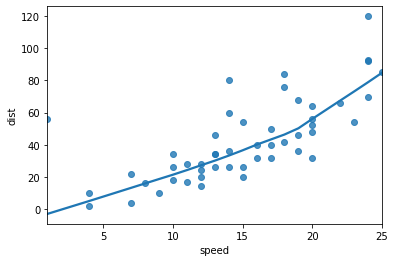

In [197]:
#!pip install statsmodels
import statsmodels
sns.regplot('speed', 'dist', lowess=True, data = df)

## 위 차트의 회귀선(꺾은선은)
- speed:[4,4,7,7,8,9,10,10,10,11,11,12,12,12,12,13,13,13,13,14,14,14,14,15,15,15,16,16,17,17,17,18,1,18,18,19,19,19,20,20,20,20,20,22,23,24,24,24,24,25]


C:\Users\Administrator\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\miniconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Administrator\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\miniconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` spe

Text(0.5, 1.0, 'Distance')

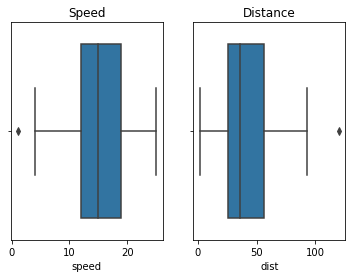

In [198]:
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 상자 그림을 첫번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('speed', data=df, ax=ax1, orient='v')
ax1.set_title('Speed')

# dist의 상자 그림을 두번째(ax2)로 그린다.
sns.boxplot('dist', data=df, ax=ax2, orient='v')
ax2.set_title('Distance')

Text(0.5, 1.0, 'Distance')

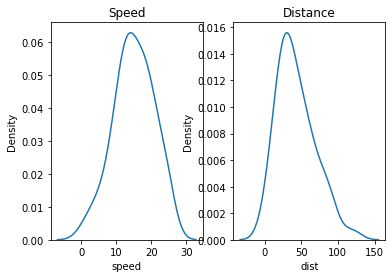

In [200]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(df['speed'], ax=ax1)
ax1.set_title('Speed')

# dist의 밀도 플롯
sns.kdeplot(df['dist'], ax=ax2)
ax2.set_title('Distance')

In [ ]:
# 왜도와 첨도
# https://m.blog.naver.com/PostView.nhn?blogId=s2ak74&logNo=220616766539&proxyReferer=https%3A%2F%2Fwww.google.com%2F
    

In [201]:
from statsmodels.formula.api import ols
res = ols('dist ~ speed', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     52.87
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           2.83e-09
Time:                        03:15:17   Log-Likelihood:                -214.34
No. Observations:                  50   AIC:                             432.7
Df Residuals:                      48   BIC:                             436.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7387      7.294     -0.924      0.360     -21.405       7.927
speed          3.3014      0.454      7.271      0.000       2.388       4.214
==============================================================================
Omnibus:                       18.681   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.666
Skew:                           1.379   Prob(JB):                     7.26e-06
Kurtosis:                       4.936   Cond. No.                         46.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 실습
- https://wikidocs.net/50031

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv("https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch8/data/train.csv", parse_dates=["datetime"])
test_df = pd.read_csv("https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch8/data/test.csv", parse_dates=["datetime"])
print(train_df.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [ ]:
#w값만 변형해보겠습니다. eSum을 0으로 만들기까지 w값을 변형
